# Script for analysis a ROOT file (a ROOT tree)

## Import libraries, files and etc

In [1]:
import ROOT
import variables as v
import re
from IPython.display import Image, display
# import numpy as np
# import glob

path_png = 'images/png/'
path_pdf = 'images/pdf/'

###### VAR INITIALIZATION ########

OMG_mass_old       = ROOT.RooRealVar('OMG_mass_old'   , 'M(#Lambda K^{-}), [GeV]', 1.61, 1.75)
OMB_pt_Cjp         = ROOT.RooRealVar('OMB_pt_Cjp'   , 'p_T(#Omega_b^{-}), [GeV]', 0, 500)
OMG_OMBcos2        = ROOT.RooRealVar('OMG_OMBcos2'  , 'cos(#Lambda, #Omega)'        , -1, 1)
OMG_KA_charge      = ROOT.RooRealVar('OMG_KA_charge'  , 'q(K_{#Omega^{-})'        , -1, 1)
LAM_mass           = ROOT.RooRealVar('LAM_mass'       , 'M(#Lambda), [GeV]'        , 1.08, 1.17)


# Add aditional vars you need for analysis and event selection  

#### CMS_picture setting, do not tourch ####

CMS_picture = True
lumi_13TeV = {2012: 19.6, 2016: 36.295, 2017: 42.14, 2018: 61.31}
isMC = 0
filename = '4-m_OmegaBToOmegaPsi-2017-2018'
years_list = [int(item) for item in re.findall(r'\d{4}', filename)]
years = {2012: '', 2016: '', 2017: '', 2018: ''}
for i in range(len(years_list)):
    if years_list[i] in years:
        years[years_list[i]] = str(years_list[i])[-2:]
#         analysis_number += '-' + years[years_list[i]]

if CMS_picture == True:
    import CMS_style
    lumi = 0
    for year in years_list:
        if years[year]:
            lumi += lumi_13TeV[year]
    if len(years_list) == 3:
        lumi = round(lumi)
    else:
        lumi = round(lumi, 1)
    
    CMS_style.lumi_13TeV = str(lumi) + ' fb^{-1}'
    # CMS_lumi.extraText       = 'Preliminary'

Welcome to JupyROOT 6.18/00


Creating a dataset **ds_imported** with variables **varset** from a _mytree_ in a .root file

In [2]:
file = ROOT.TFile(filename + '.root')

varset = ROOT.RooArgSet(OMG_mass_old, OMB_pt_Cjp, OMG_OMBcos2, OMG_KA_charge, 
#       
                       ) 
varset.add(ROOT.RooArgSet(OMG_KA_charge, LAM_mass, LAM_PR_charge,
#                          
                        ))

ds_importedR = ROOT.RooDataSet('dataR', '', file.Get('mytree'), varset)
ds_importedR.Print()
ds_importedW = ROOT.RooDataSet('dataW', '', file.Get('mytree'), varset)
ds_importedW.Print()
file.Close()

[#1] INFO:Eval -- RooTreeDataStore::loadValues(dataR) Ignored 81 out of range events
RooDataSet::dataR[OMG_mass_old,OMB_pt_Cjp,OMG_OMBcos2,OMG_KA_charge,LAM_mass,LAM_PR_charge] = 602348 entries
[#1] INFO:Eval -- RooTreeDataStore::loadValues(dataW) Ignored 81 out of range events
RooDataSet::dataW[OMG_mass_old,OMB_pt_Cjp,OMG_OMBcos2,OMG_KA_charge,LAM_mass,LAM_PR_charge] = 602348 entries


Creating **cut_summary** string from **cuts_list** of each variable

In [9]:
cuts_list = []
# cut_jpsi = f'Jpsi_Psi2S_mass_Cmumu > {v.PDG_JPSI_MASS - 0.1} && Jpsi_Psi2S_mass_Cmumu < {round(v.PDG_JPSI_MASS + 0.1, 9)}'
# cut_psi2s = f'Jpsi_Psi2S_mass_Cmumu > {round(v.PDG_PSI2S_MASS - 0.075, 9)} && Jpsi_Psi2S_mass_Cmumu < {round(v.PDG_PSI2S_MASS + 0.075, 9)}'
# cuts_list.append(f'OMG_mass_old > {1.67245 - 0.007} && OMG_mass_old < {round(1.67245 + 0.007, 9)}')
cuts_list.append(f'LAM_mass > {v.PDG_LAMBDA_MASS - 0.01} && LAM_mass < {v.PDG_LAMBDA_MASS + 0.01}')
cuts_list.append('OMB_pt_Cjp > 10')

# cut_psi = '((' + cut_jpsi + ') || (' + cut_psi2s + '))'
# cuts_list.append(cut_psi)
# cuts_list.append(cut_jpsi)

# cut_xi = f'(XI_lamk_mass < {1.32202 - 0.00822} || XI_lamk_mass > {1.32202 + 0.00822})'
# # cuts_list.append(cut_xi)

#
### HERE you can add you own cuts!
#

# create cut_summary
cut_summary = cuts_list[0] + ' && ' + cuts_list[1]
for a_cut in cuts_list[2:]:
    cut_summary += ' && ' + a_cut
#     cut_summary += a_cut + ' && '
print(cut_summary)

LAM_mass > 1.105683 && LAM_mass < 1.125683 && OMB_pt_Cjp > 10


Reducing **ds_imported** with a _cut_summary_, creating **ds_cutted**

Saving our cutted file into **fileOUT** as _TTree_

In [10]:
ds_cutted_Right = ds_importedR.reduce(cut_summary)
ds_cutted_Right.Print()
# ds_cutted_Wrong = ds_importedW.reduce(cut_summary)
# ds_cutted_Wrong.Print()

fileOUT = ROOT.TFile(f'cutted_OMB.root', 'recreate')
ds_cutted_Right      .GetClonedTree().Write()
# ds_cutted_Wrong      .GetClonedTree().Write()
fileOUT.Close()

RooDataSet::dataR[OMG_mass_old,OMB_pt_Cjp,OMG_OMBcos2,OMG_KA_charge,LAM_mass,LAM_PR_charge] = 502771 entries


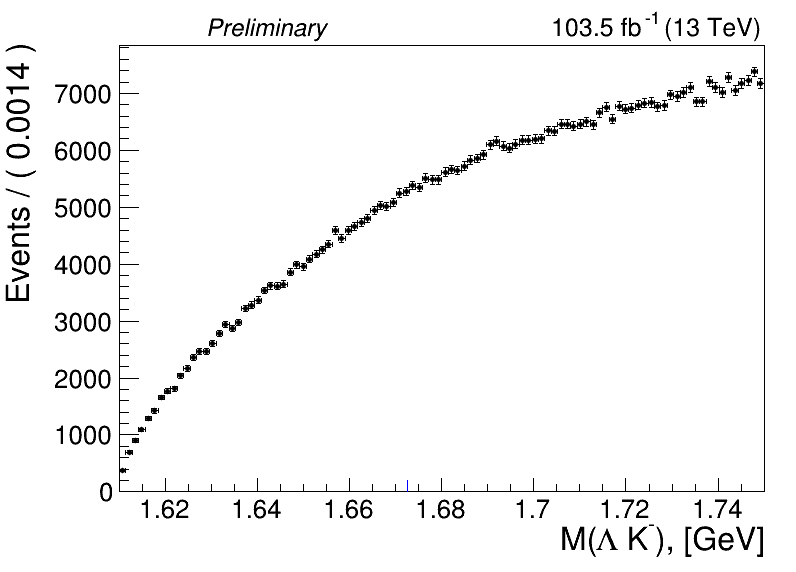

Warning in <TCanvas::Constructor>: Deleting canvas with same name: cB
Info in <TCanvas::Print>: png file images/png/test_for_output_ds.png has been created
Info in <TCanvas::Print>: pdf file images/pdf/test_for_output_ds.pdf has been created


In [16]:
bufram = OMG_mass_old.frame(100)

if CMS_picture == True:
    CMS_style.setTDRStyle()

_MYW = 800
_MYH = 600
_MYT = 0.08*_MYH
_MYB = 0.14*_MYH
_MYL = 0.15*_MYW
_MYR = 0.04*_MYW

cB = ROOT.TCanvas('cB','cB',_MYW,_MYH)

cB.SetLeftMargin( _MYL/_MYW )
cB.SetRightMargin( _MYR/_MYW )
cB.SetTopMargin( _MYT/_MYH )
cB.SetBottomMargin( _MYB/_MYH )
cB.SetTickx(0)
cB.SetTicky(0)

bufram.GetYaxis().SetTitleOffset(1.3)
# ds_cutted_Wrong.plotOn(bufram, ROOT.RooFit.DrawOption('B'), ROOT.RooFit.DataError(2), 
#                   ROOT.RooFit.Name('wrong_sign'),
#                   ROOT.RooFit.FillColor(ROOT.kGray), ROOT.RooFit.XErrorSize(0))
ds_cutted_Right.plotOn(bufram, ROOT.RooFit.MarkerSize(0.6), ROOT.RooFit.Name('data'))
bufram.Draw()
# bufram.Draw()

if CMS_picture == True:
    CMS_style.CMS_lumi( cB, 0 if isMC==1 else 4, 0 ); ## 2nd argument = 0 for MC
    cB.Update(); cB.RedrawAxis(); cB.GetFrame().Draw();

# leg = ROOT.TLegend(0.8,0.71,0.95,0.91)
# # leg = ROOT.TLegend(0.17
# leg.SetTextFont(42)
# leg.SetTextSize(0.05)
# # leg.AddEntry(bufram.findObject('data')      ,'data'               , 'ep')
# # leg.AddEntry(bufram.findObject('wrong_sign'),'#LambdaK^{+}', 'f')
# leg.Draw('same')

l = ROOT.TLine(1.67245, 0, 1.67245, 200)
l.SetLineWidth(1)
l.SetLineColor(ROOT.kBlue)
l.Draw()

# lb = ROOT.TLine(6.0461, 0, 6.0461, 5)
# lb.SetLineWidth(1)
# lb.SetLineColor(ROOT.kBlue)
# lb.Draw()

cB.SaveAs('images/png/test_for_output_ds.png')
cB.SaveAs('images/pdf/test_for_output_ds.pdf')
display(Image(filename = 'images/png/test_for_output_ds.png', retina = False, width = 550))

In [79]:
# bmin = 1.62
# bmax = 1.74
# Nbin = 60
# Omega_m.setMin(bmin)
# Omega_m.setMax(bmax)
# cut_binning = f'OMG_mass_old > {bmin} && OMG_mass_old < {bmax}'

bmin = 5.85
bmax = 6.25
Nbin = 40
OMB_mass_Cjp_old.setMin(bmin)
OMB_mass_Cjp_old.setMax(bmax)
cut_binning = f'OMB_mass_Cjp_old > {bmin} && OMB_mass_Cjp_old < {bmax}'

ds = ds_cutted_Right.reduce(cut_binning)
ds.Print()
dsW = ds_cutted_Wrong.reduce(cut_binning)
dsW.Print()

# S_mean_0 = 1.67 # initial mean of signal 
S_mean_0 = 6.05 # initial mean of signal 
S_0 = 20  # initial number of signal events

# limits for number of signal events for fitting
S_upper = 500
S_lower = 0

S       = ROOT.RooRealVar ( 'N_Signal'      , 'Signal'  , S_0      , S_lower , S_upper)

S1_mean = ROOT.RooRealVar ( 'S1_mean', 'mean '   , S_mean_0 , S_mean_0-0.1, S_mean_0+0.1)
S1_sigma= ROOT.RooRealVar ( 'S1_sigma','sigma'   , 0.006   , 0.000001   , 0.09   )

pdfS1   = ROOT.RooGaussian( 'pdfS1'  , 'gaus'    , OMB_mass_Cjp_old  , S1_mean , S1_sigma)

backgroung_Bernstein = 1
if backgroung_Bernstein:  
    B       = ROOT.RooRealVar   ( 'Bg'    , 'Back' , 40000 , 1     , 900000000)
    B_c     = ROOT.RooRealVar   ( 'B_c'   , 'B_c ' , -2.3  , -20   , 100)
    B_1     = ROOT.RooRealVar   ( 'B_1'   , 'B_1 ' , 0.1   , 0.0   , 1.0)
    B_2     = ROOT.RooRealVar   ( 'B_2'   , 'B_2 ' , 0.1   , 0.0   , 1.0)
    B_3     = ROOT.RooRealVar   ( 'B_3'   , 'B_3 ' , 0.1   , 0.0   , 1.0)
    B_4     = ROOT.RooRealVar   ( 'B_3'   , 'B_3 ' , 0.1   , 0.0   , 1.0)
    BX1     = ROOT.RooFormulaVar( 'BX1'   , 'BX1'  , '1.0 - @0'            , ROOT.RooArgList(B_1))
    BX2     = ROOT.RooFormulaVar( 'BX2'   , 'BX2'  , '1.0 - @0 -@1'        , ROOT.RooArgList(B_1, B_2))
    BX3     = ROOT.RooFormulaVar( 'BX3'   , 'BX3'  , '1.0 - @0 -@1 -@2'    , ROOT.RooArgList(B_1, B_2, B_3))
    BX4     = ROOT.RooFormulaVar( 'BX4'   , 'BX4'  , '1.0 - @0 -@1 -@2 -@3', ROOT.RooArgList(B_1, B_2, B_3, B_4))
    
    if backgroung_Bernstein   == 1:
        pdfB    = ROOT.RooBernstein('pdfB', 'pdfB' , OMB_mass_Cjp_old, ROOT.RooArgList(B_1, BX1)) 
    elif backgroung_Bernstein == 2:
        pdfB    = ROOT.RooBernstein('pdfB', 'pdfB' , OMB_mass_Cjp_old, ROOT.RooArgList(B_1, B_2, BX2))
    elif backgroung_Bernstein == 3:
        pdfB    = ROOT.RooBernstein('pdfB', 'pdfB' , OMB_mass_Cjp_old, ROOT.RooArgList(B_1, B_2, B_3, BX3))
    elif backgroung_Bernstein == 4:
        pdfB    = ROOT.RooBernstein('pdfB', 'pdfB' , OMB_mass_Cjp_old, ROOT.RooArgList(B_1, B_2, B_3, B_4, BX4))

alist1  = ROOT.RooArgList (pdfS1, pdfB)
alist2  = ROOT.RooArgList (S, B)
pdfSum  = ROOT.RooAddPdf  ('model', 'model', alist1, alist2)

RooDataSet::dataR[OMG_mass_old,OMB_pt_Cjp,OMG_OMBcos2,OMB_pvcos2_Cjp,OMB_pvdistsignif2_Cjp,OMB_mass_Cjp_old,OMG_KA_pt_CV,OMG_pt,OMG_KA_ips,LAM_mass,LAM_OMGcos2_CL,XI_lamk_mass,XB_mass,LAM_pt,Jpsi_Psi2S_mass_Cmumu,LAM_OMGdistsignif3,OMG_OMBdistsignif3,OMB_vtxprob_Cjp,LAM_PR_pt] = 191 entries
RooDataSet::dataW[OMG_mass_old,OMB_pt_Cjp,OMG_OMBcos2,OMB_pvcos2_Cjp,OMB_pvdistsignif2_Cjp,OMB_mass_Cjp_old,OMG_KA_pt_CV,OMG_pt,OMG_KA_ips,LAM_mass,LAM_OMGcos2_CL,XI_lamk_mass,XB_mass,LAM_pt,Jpsi_Psi2S_mass_Cmumu,LAM_OMGdistsignif3,OMG_OMBdistsignif3,OMB_vtxprob_Cjp,LAM_PR_pt] = 76 entries


In [59]:
S1_sigma.setConstant(True)
S1_mean.setConstant(True);

rrr = pdfSum.fitTo(ds, ROOT.RooFit.NumCPU(7), ROOT.RooFit.PrintLevel(-1), ROOT.RooFit.Save())
print('1 fit done')

S1_sigma.setConstant(False)

rrr = pdfSum.fitTo(ds, ROOT.RooFit.NumCPU(7), ROOT.RooFit.PrintLevel(-1), ROOT.RooFit.Save())
print('2 fit done')

S1_mean.setConstant(False)
rrr = pdfSum.fitTo(ds, ROOT.RooFit.NumCPU(7), ROOT.RooFit.PrintLevel(-1), ROOT.RooFit.Save())
print('3 fit done')

rrr = pdfSum.fitTo(ds, ROOT.RooFit.NumCPU(7), ROOT.RooFit.PrintLevel(-1), ROOT.RooFit.Save())
rrr.Print()

1 fit done
2 fit done
3 fit done
[#1] INFO:Minization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Eval -- RooAbsTestStatistic::initMPMode: started 7 remote server process.
[#1] INFO:Minization --  The following expressions have been identified as constant and will be precalculated and cached: (pdfS1)
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (pdfB)
[#1] INFO:Minization --  The following expressions have been identified as constant and will be precalculated and cached: (pdfS1)
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (pdfB)
[#1] INFO:Minization --  The following expressions have been identified as constant and will be precalculated and cached: (pdfS1)
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (pdfB)
[

In [60]:
if CMS_picture == True:
    CMS_style.setTDRStyle()

_MYW = 960
_MYH = 720
_MYT = 0.08 * _MYH
_MYB = 0.14 * _MYH
_MYL = 0.15 * _MYW
_MYR = 0.04 * _MYW

cB = ROOT.TCanvas('cB','cB', _MYW, _MYH)
_MYcanvName = f'my_run_test_Omegab_3'

cB.SetLeftMargin( _MYL/_MYW )
cB.SetRightMargin( _MYR/_MYW )
cB.SetTopMargin( _MYT/_MYH )
cB.SetBottomMargin( _MYB/_MYH )
cB.SetTickx(0)
cB.SetTicky(0)

Sign = S.getVal() / S.getError()
S_str_c = 'N_{signal} = ' + str(round(S.getVal(), 1)) + ' #pm ' + str(round(S.getError(), 1))
M_str_c = 'M = ' + str(round(1000 * S1_mean.getVal(), 2)) + r' #pm ' + str(round(1000 * S1_mean.getError(), 2)) + ' MeV'
sign_str_c = '#frac{N_{signal}}{#sigma_{N_{signal}}} = ' + str(round(Sign, 2))  
sigmaG_str_c = '#sigma_{Gauss} = ' + str(round(1000 * S1_sigma.getVal(), 2)) + r' #pm ' + str(round(1000 * S1_sigma.getError(), 2)) + ' MeV'

Warning in <TCanvas::Constructor>: Deleting canvas with same name: cB


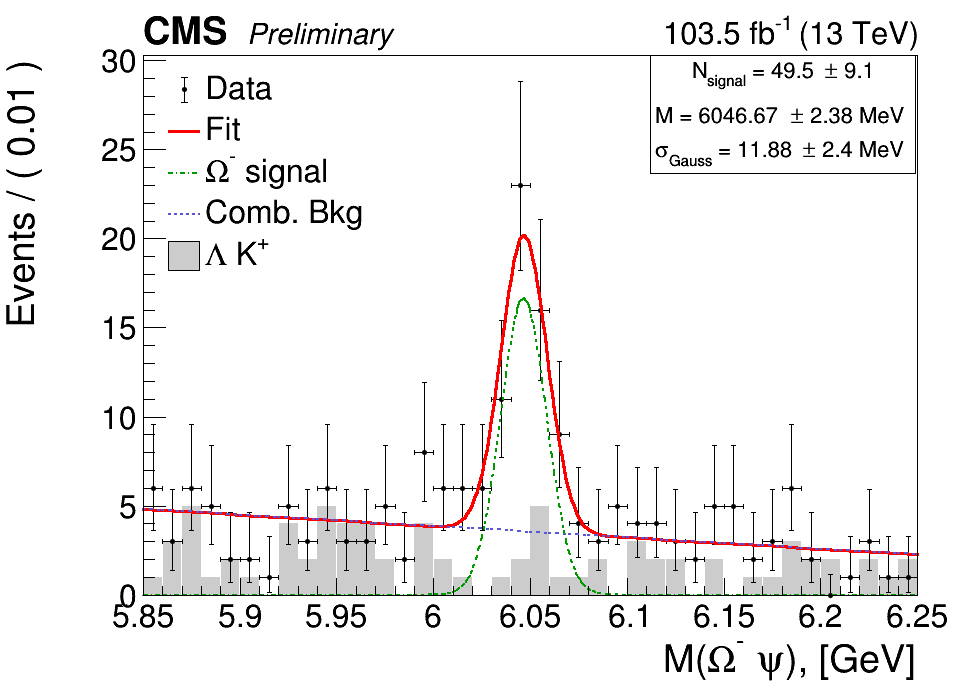

[#1] INFO:Plotting -- RooPlot::updateFitRangeNorm: New event count of 191 will supercede previous event count of 76 for normalization of PDF projections
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) only plotting range [5.85,6.25], curve is normalized to data in given given range
[#1] INFO:NumericIntegration -- RooRealIntegral::init(model_Int[OMB_mass_Cjp_old|plotRange]_Norm[OMB_mass_Cjp_old]) using numeric integrator RooIntegrator1D to calculate Int(OMB_mass_Cjp_old)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (pdfB)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: (BX1)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (pdfS1)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: ()


Info in <TCanvas::Print>: png file images/png/my_run_test_Omegab_3.png has been created
Info in <TCanvas::Print>: pdf file images/pdf/my_run_test_Omegab_3.pdf has been created


In [61]:
bufram = OMB_mass_Cjp_old.frame(40);
bufram.GetXaxis().SetTitleOffset(1.0)
bufram.GetYaxis().SetTitleOffset(1.3)
dsW.plotOn(bufram, ROOT.RooFit.DrawOption('B'), ROOT.RooFit.DataError(2),
                  ROOT.RooFit.FillColor(ROOT.kGray), ROOT.RooFit.XErrorSize(0), ROOT.RooFit.Name('wrong_sign'))
ds.plotOn(bufram, ROOT.RooFit.MarkerSize(0.6), ROOT.RooFit.Name('data'))

pdfSum.plotOn(  bufram,     ROOT.RooFit.LineColor(2),
                            ROOT.RooFit.LineStyle(1),
                            ROOT.RooFit.LineWidth(3),
                            ROOT.RooFit.Name('fit'),
                            ROOT.RooFit.Range(bmin, bmax) )

pdfSum.plotOn(  bufram,     ROOT.RooFit.Components('pdfB'),
                            ROOT.RooFit.LineColor(9),
                            ROOT.RooFit.LineStyle(2),
                            ROOT.RooFit.LineWidth(2),
#                             ROOT.RooFit.DrawOption('F'),
#                             ROOT.RooFit.FillColor(ROOT.kGreen),
                            ROOT.RooFit.Name('bkgr'))


pdfSum.plotOn(  bufram,     ROOT.RooFit.Components('pdfS1'),
                                ROOT.RooFit.LineColor(ROOT.kGreen+2),
                                ROOT.RooFit.LineStyle(5),
                                ROOT.RooFit.LineWidth(2),
#                                 ROOT.RooFit.DrawOption('F'),
#                                 ROOT.RooFit.FillColor(ROOT.kGreen),
#               ,ROOT.RooFit.Range(S1_mean.getVal()-5.0*sigma_eff, S1_mean.getVal()+5.0*sigma_eff)  
                                ROOT.RooFit.Name('sign')
                 )

# pdfSum_Jpsi.plotOn(  bufram,    ROOT.RooFit.Components('pdfS1_Jpsi'),
#                                 ROOT.RooFit.LineColor(ROOT.kBlue + 2),
#                                 ROOT.RooFit.LineStyle(5),
#                                 ROOT.RooFit.LineWidth(2),
#                                 ROOT.RooFit.Name('sign_Jspi')
# #               ,ROOT.RooFit.Range(S1_mean.getVal()-5.0*sigma_eff, S1_mean.getVal()+5.0*sigma_eff)  
#                  )

# pdfSum_Psi2S.plotOn(  bufram,   ROOT.RooFit.Components('pdfS1_Psi2S'),
#                                 ROOT.RooFit.LineColor(ROOT.kGreen - 2),
#                                 ROOT.RooFit.LineStyle(5),
#                                 ROOT.RooFit.LineWidth(2),
#                                 ROOT.RooFit.Name('sign_Psi2S')
# #               ,ROOT.RooFit.Range(S1_mean.getVal()-5.0*sigma_eff, S1_mean.getVal()+5.0*sigma_eff)  
#                  )

# ds.plotOn( bufram, ROOT.RooFit.MarkerSize(0.6), ROOT.RooFit.Name('data'))

# bufram.SetTitle('')##nn

# pdfSum.paramOn(bufram, ROOT.RooFit.Layout(0.58, 0.96, 0.92))

# bufram.SetTitle('S='+str(round(S.getVal(),2))[:8]+'#pm'+str(round(S.getError(),2))[:5]+'\n M='+str(1000*S1_mean.getVal())[:7]+'#pm'+str(round(1000*S1_mean.getError(),2))[:5] + '\n S/dS=' + str(round(Sign,1)))
# # +'\n dM=' + str(round(Delta_M, 2))
# hist_Wrong.plotOn(bufram, ROOT.RooFit.DrawOption('B'), 
#                   ROOT.RooFit.FillColor(ROOT.kGray), ROOT.RooFit.XErrorSize(0)) 
bufram.Draw()

# leg = ROOT.TLegend(0.47,0.6,0.65,0.9)
leg = ROOT.TLegend(0.17,0.6,0.35,0.9)
leg.SetTextFont(42)
leg.SetTextSize(0.05)
leg.AddEntry(bufram.findObject('data')      ,'Data'               , 'ep')
leg.AddEntry(bufram.findObject('fit')       ,'Fit'                , 'l')
leg.AddEntry(bufram.findObject('sign')      ,'#Omega^{-} signal'             , 'l')
leg.AddEntry(bufram.findObject('bkgr')  ,'Comb. Bkg', 'l')
leg.AddEntry(bufram.findObject('wrong_sign'),'#Lambda K^{+}', 'f')
leg.Draw('same')

if CMS_picture == True:
    CMS_style.CMS_lumi( cB, 0 if isMC==1 else 4, 0 ); ## 2nd argument = 0 for MC
    cB.Update(); cB.RedrawAxis(); cB.GetFrame().Draw();

# text_com = ROOT.TPaveText(0.15, 0.9195, 0.45, 0.75, 'NBNDC')
text_com = ROOT.TPaveText(0.68, 0.9195, 0.958, 0.75, 'NBNDC')
# text_com = ROOT.TPaveText(0.68, 0.4, 0.958, 0.14, 'NBNDC')
# text_com.SetLabel('Fit results:')
text_com.SetTextFont(42)
text_com.SetTextSize(0.035)
text_com.AddText(S_str_c)
# # text_com.AddText(S_Jpsi_str_c)
# # text_com.AddText(S_Psi2S_str_c)
text_com.AddText(M_str_c)
text_com.AddText(sigmaG_str_c)
# text_com.AddText(sign_str_c)
# text_com.AddText(delta_str_c)
text_com.SetBorderSize(1);
text_com.SetFillColor(0);
text_com.Draw('same');

# l = ROOT.TLine(1.67245, 0, 1.67245, 30)
# l.SetLineWidth(1)
# l.SetLineColor(ROOT.kBlue)
# l.Draw()

cB.SaveAs(path_png + _MYcanvName + '.png')
cB.SaveAs(path_pdf + _MYcanvName + '.pdf')
display(Image(filename = path_png + _MYcanvName + '.png', retina = False, width = 600))

In [62]:
LS = rrr.minNll()
binN1 = rrr.floatParsFinal().getSize()
# S2_mean.setConstant(True)
# S3_sigma.setConstant(True)
#S2_sigma.setConstant(True)
#S2_frac.setConstant(True) 
# S2_sigma.setConstant(True)
S1_sigma.setConstant(True)
# S2_frac.setConstant(True)

S.setVal(0)
S.setConstant(True)

rrr = pdfSum.fitTo( ds, ROOT.RooFit.NumCPU(4), ROOT.RooFit.PrintLevel(-1), ROOT.RooFit.Save(), ROOT.RooFit.Extended(True))
rrr = pdfSum.fitTo( ds, ROOT.RooFit.NumCPU(4), ROOT.RooFit.PrintLevel(-1), ROOT.RooFit.Save(), ROOT.RooFit.Extended(True))
rrr = pdfSum.fitTo( ds, ROOT.RooFit.NumCPU(4), ROOT.RooFit.PrintLevel(-1), ROOT.RooFit.Save(), ROOT.RooFit.Extended(True))

L0 = rrr.minNll()

prob = ROOT.TMath.Prob(L0-LS, 2 )
print('Signif =', ROOT.TMath.ErfcInverse (prob) * np.sqrt(2.))

Signif = 5.596266907356292
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Eval -- RooAbsTestStatistic::initMPMode: started 4 remote server process.
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (pdfS1,pdfB)
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (pdfS1,pdfB)
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (pdfS1,pdfB)
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (pdfS1,pdfB)
[#1] INFO:Minization -- RooMinimizer::optimizeConst: deactivating const optimization
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Eval -- RooAbsTestStatistic::initMPMode: started 4 remote server process.
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (pdfS1,pdfB)
[#1] INFO:Minizatio